In [10]:
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def get_weather_impact(weather):
    if weather in [0, 1]:
        return 0
    elif weather == 2:
        return 2
    elif weather == 3:
        return 3
    else:
        return None
    
def fuel_consumption_kg(distance, speed, weather):
    fc_dspeed = 600
    dspeed = 12
    weather_impact = get_weather_impact(weather)
    return (distance / (speed - weather_impact)) * fc_dspeed * math.pow((speed / dspeed), 3)

def fuel_consumption_kg_hour(distance, speed, weather):
    fc_kg = fuel_consumption_kg(distance, speed, weather)
    duration = distance / speed
    return fc_kg / duration

def fuel_consumption_kg_nm(distance, speed, weather):
    fc_kg = fuel_consumption_kg(distance, speed, weather)
    return fc_kg / distance

In [12]:
distance = 50
min_speed, max_speed = 10, 14

speed_to_fc = {weather: {speed: fuel_consumption_kg_nm(distance, speed, weather) 
                         for speed in range(min_speed, max_speed + 1)} 
               for weather in range(1, 4)}
speed_to_fc

{1: {10: 34.72222222222223,
  11: 42.013888888888886,
  12: 50.0,
  13: 58.680555555555536,
  14: 68.05555555555557},
 2: {10: 43.402777777777786,
  11: 51.350308641975296,
  12: 60.0,
  13: 69.34974747474746,
  14: 79.39814814814817},
 3: {10: 49.60317460317462,
  11: 57.769097222222214,
  12: 66.66666666666666,
  13: 76.28472222222221,
  14: 86.61616161616165}}

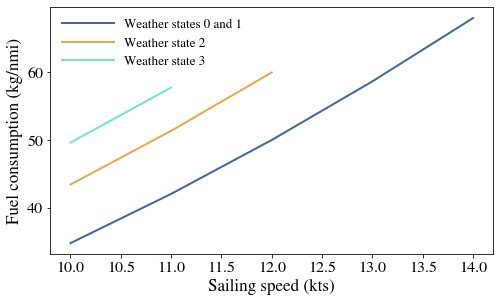

In [21]:
path = os.getcwd()

speeds_ws01 = list(speed_to_fc[1].keys())
fcs_ws01 = list(speed_to_fc[1].values())
speeds_ws2 = list(speed_to_fc[2].keys())[:-2]
fcs_ws2 = list(speed_to_fc[2].values())[:-2]
speeds_ws3 = list(speed_to_fc[3].keys())[:-3]
fcs_ws3 = list(speed_to_fc[3].values())[:-3]

plt.plot(speeds_ws01, fcs_ws01, color='#456990', label='Weather states 0 and 1')
plt.plot(speeds_ws2, fcs_ws2, color='#EBA947', label='Weather state 2')
plt.plot(speeds_ws3, fcs_ws3, color='#76E5C4', label='Weather state 3')
plt.xlabel('Sailing speed (kts)')
plt.ylabel('Fuel consumption (kg/nmi)')
plt.style.use(os.path.join(path, 'PaperDoubleFig.mplstyle'))
plt.legend(frameon=False, loc='best', ncol=1, handlelength=4)
plt.savefig('fc.jpg', dpi=400)
plt.show()